In [55]:
import pandas as pd 
import seaborn as sns

In [56]:
url = 'https://raw.githubusercontent.com/adamflasse/dataCleaning/ankitahaldia/updated_1.csv'
df = pd.read_csv(url, sep=',')

df = df[df.price !=0]
df.head()

postcode  house_is    property_subtype     price  rooms_number   area  \
0      1150      True               HOUSE  990000.0           6.0  485.0   
1      4180      True               HOUSE  195000.0           3.0  242.0   
2      4480      True               HOUSE  245000.0           5.0  142.0   
3      4180      True  MIXED_USE_BUILDING  295000.0           3.0  242.0   
4      4570      True               HOUSE  549000.0           5.0  365.0   

  kitchen_has      furnished        terrace garden  facades_number  \
0        True  Not specified  Not specified   True             2.0   
1        True           True  Not specified   True             3.0   
2        True           True  Not specified   True             4.0   
3        True           True  Not specified   True             3.0   
4        True           True  Not specified   True             4.0   

  swimming_pool_has building_state                 province    region  
0             False         As New  Brussels Capital Region  Brussels  
1             False  Not specified                    Liège  Wallonia  
2             False  Not specified                    Liège  Wallonia  
3             False  Not specified                    Liège  Wallonia  
4             False  Not specified                    Liège  Wallonia

In [57]:
#get the min per region
new_df = df.groupby(['region', 'province', 'postcode']).price.min().reset_index()
brussels = new_df.loc[new_df['region'] == 'Brussels']
brussels.head(100)
wallonia = new_df.loc[new_df['region'] == 'Wallonia']
flanders = new_df.loc[new_df['region'] == 'Flanders']
flanders.head()

region province  postcode     price
22  Flanders  Antwerp      2000  109000.0
23  Flanders  Antwerp      2018   60000.0
24  Flanders  Antwerp      2020   50000.0
25  Flanders  Antwerp      2040  297000.0
26  Flanders  Antwerp      2050  152500.0

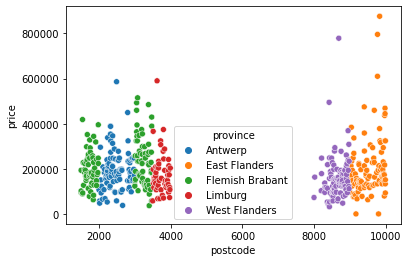

In [58]:
price_flanders_min = sns.scatterplot(x = 'postcode', y= 'price', hue='province', data = flanders  )

#price_flanders_min.set_style("ticks", {"xtick.major.size": 4, "ytick.major.size": 8})

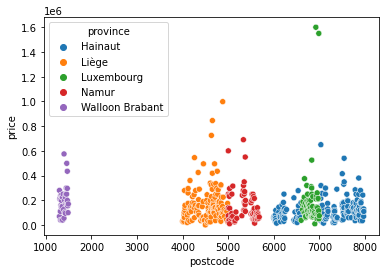

In [59]:
price_wallonia_min = sns.scatterplot(x = 'postcode', y= 'price', hue='province', data = wallonia)


In [60]:
new_df = df.groupby(['region', 'province', 'postcode']).price.max().reset_index()
brussels = new_df.loc[new_df['region'] == 'Brussels']
brussels.head(100)
wallonia = new_df.loc[new_df['region'] == 'Wallonia']
flanders = new_df.loc[new_df['region'] == 'Flanders']
flanders.head()

region province  postcode      price
22  Flanders  Antwerp      2000  7000000.0
23  Flanders  Antwerp      2018  2450000.0
24  Flanders  Antwerp      2020  5500000.0
25  Flanders  Antwerp      2040   399000.0
26  Flanders  Antwerp      2050   685000.0

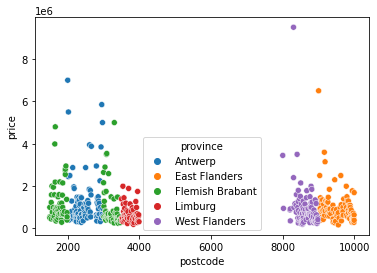

In [61]:
price_flanders_max = sns.scatterplot(x = 'postcode', y= 'price', hue='province', data = flanders  )

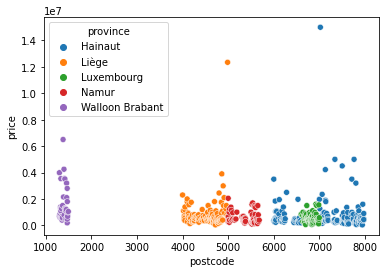

In [62]:
price_wallonia_max = sns.scatterplot(x = 'postcode', y= 'price', hue='province', data = wallonia)

In [63]:
new_df = df.groupby('building_state').price.mean().reset_index()
new_df

building_state          price
0           As New  583752.317701
1             Good  325229.840710
2    Not specified  394971.409196
3  To be Renovated  274617.315310

<AxesSubplot:xlabel='building_state', ylabel='price'>

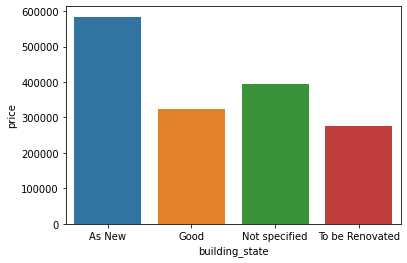

In [64]:
sns.barplot(x='building_state', y='price', data= new_df)

In [65]:
new_df = df.groupby('garden').price.mean().reset_index()
new_df

garden          price
0          False  377747.026828
1  Not specified  517041.934673
2           True  484046.461397

<AxesSubplot:xlabel='garden', ylabel='price'>

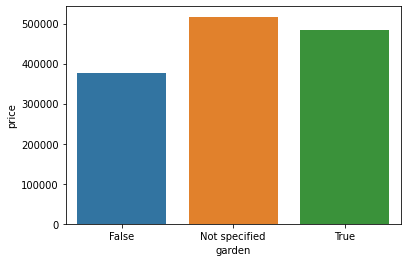

In [66]:
sns.barplot(x='garden', y='price', data= new_df)

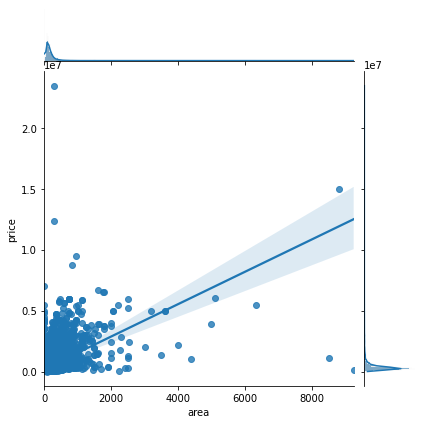

In [68]:
sns.jointplot(x='area', y= 'price', data=df, kind='reg')

In [69]:
new_df = df.groupby('province').price.mean().reset_index()

[Text(0, 0, 'Antwerp'),
 Text(1, 0, 'Brussels Capital Region'),
 Text(2, 0, 'East Flanders'),
 Text(3, 0, 'Flemish Brabant'),
 Text(4, 0, 'Hainaut'),
 Text(5, 0, 'Limburg'),
 Text(6, 0, 'Liège'),
 Text(7, 0, 'Luxembourg'),
 Text(8, 0, 'Namur'),
 Text(9, 0, 'Walloon Brabant'),
 Text(10, 0, 'West Flanders')]

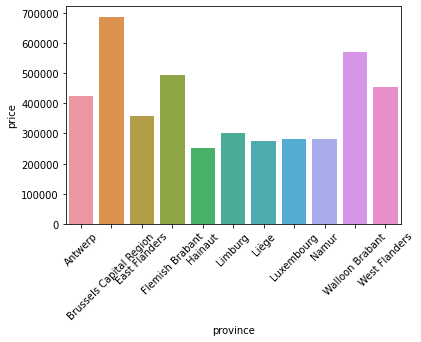

In [72]:
chart = sns.barplot(x='province', y='price', data= new_df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)